<a href="https://colab.research.google.com/github/Jakondo/Python-for-DL-and-CV/blob/master/Ch5_Perceptrons_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 5: Perceptrons - PyTorch

---



In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

#Creating Dataset

In [0]:
#Создание датасета (два набора точек с центрами для каждого множества)
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.FloatTensor(X)
y_data = torch.FloatTensor(y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1]);
  plt.scatter(X[y==1, 0], X[y==1, 1]);

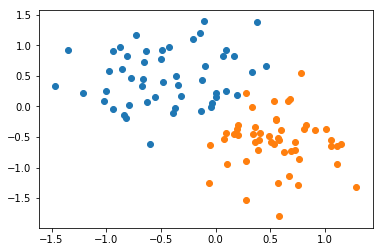

In [16]:
scatter_plot()

#Perceptron Model

In [0]:
#Создание линейной модели
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)  
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x)) #Фукнция активации
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0

In [48]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1 ,w2 = w.view(2) #веса
def get_params():  
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

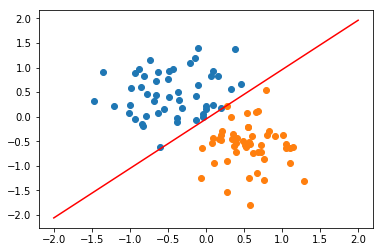

In [36]:
plot_fit("Ex")

#Training Model

In [0]:
criterion = nn.BCELoss() #функция потерь
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #функция оптимизации


In [38]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, "loss: ", loss.item())  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.25603345036506653
epoch:  1 loss:  0.2559147775173187
epoch:  2 loss:  0.25579628348350525
epoch:  3 loss:  0.2556779086589813
epoch:  4 loss:  0.2555598318576813
epoch:  5 loss:  0.2554418444633484
epoch:  6 loss:  0.2553239166736603
epoch:  7 loss:  0.25520631670951843
epoch:  8 loss:  0.25508877635002136
epoch:  9 loss:  0.2549714148044586
epoch:  10 loss:  0.2548542320728302
epoch:  11 loss:  0.25473710894584656
epoch:  12 loss:  0.25462016463279724
epoch:  13 loss:  0.254503458738327
epoch:  14 loss:  0.2543868124485016
epoch:  15 loss:  0.25427037477493286
epoch:  16 loss:  0.25415417551994324
epoch:  17 loss:  0.2540379464626312
epoch:  18 loss:  0.2539219856262207
epoch:  19 loss:  0.25380611419677734
epoch:  20 loss:  0.25369036197662354
epoch:  21 loss:  0.25357481837272644
epoch:  22 loss:  0.2534595727920532
epoch:  23 loss:  0.25334423780441284
epoch:  24 loss:  0.25322917103767395
epoch:  25 loss:  0.253114253282547
epoch:  26 loss:  0.25299954414367676

Text(0.5, 0, 'Epoch')

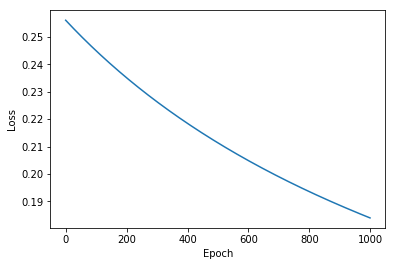

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

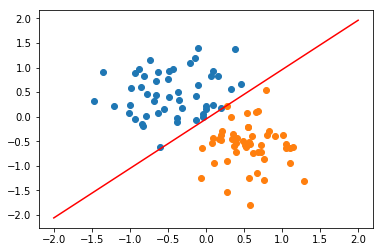

In [40]:
plot_fit('Trained model')

#Testing Model

Red point pozitive probability = 0.6281726956367493
Black point pozitive probability = 0.4659110903739929
Red point in class = 1
Black point in class = 0


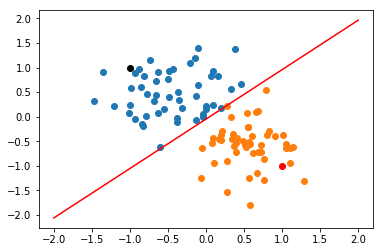

In [50]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("Red point pozitive probability = {}".format(model.forward(point1).item()))
print("Black point pozitive probability = {}".format(model.forward(point2).item()))

print("Red point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))

plot_fit('Trained model')